## Let's Start with Exploration of data

In [3]:
from datasets import load_dataset
ds = load_dataset("CADCODER/GenCAD-Code", num_proc=16, split=["train", "test"], cache_dir="/Volumes/BIG-DATA/HUGGINGFACE_CACHE")

c:\Users\rocco\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print(ds)
print(ds[0][5])

[Dataset({
    features: ['image', 'deepcad_id', 'cadquery', 'token_count', 'prompt', 'hundred_subset'],
    num_rows: 147289
}), Dataset({
    features: ['image', 'deepcad_id', 'cadquery', 'token_count', 'prompt', 'hundred_subset'],
    num_rows: 7355
})]
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=448x448 at 0x1C65047CAD0>, 'deepcad_id': '0000/00006629', 'cadquery': 'import cadquery as cq\n# Generating a workplane for sketch 0\nwp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(0.0, -0.0390625, -0.15625), cq.Vector(3.749399456654644e-33, 1.0, -6.123233995736766e-17), cq.Vector(1.0, 0.0, 6.123233995736766e-17)))\nloop0=wp_sketch0.moveTo(0.0352796052631579, 0.0).threePointArc((0.03754746418308187, 0.0009393779221812848), (0.03848684210526316, 0.003207236842105263)).lineTo(0.03848684210526316, 0.3014802631578947).threePointArc((0.03754746418308187, 0.3037481220778187), (0.0352796052631579, 0.3046875)).lineTo(0.0, 0.3046875).lineTo(0.0, 0.29827302631578945).lineTo(0.03207236

import cadquery as cq
# Generating a workplane for sketch 0
wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(-0.015625, -0.0078125, 0.0), cq.Vector(1.0, 0.0, 0.0), cq.Vector(0.0, 0.0, 1.0)))
loop0=wp_sketch0.moveTo(0.0, 0.0).threePointArc((0.0007948582418457166, -0.0019189575476279677), (0.0027138157894736844, -0.0027138157894736844)).lineTo(0.021217105263157895, -0.0027138157894736844).threePointArc((0.022787161438489866, -0.00206347722796355), (0.0234375, -0.000493421052631579)).lineTo(0.0234375, 0.018256578947368422).threePointArc((0.02283825686147997, 0.019949990385858287), (0.021217105263157895, 0.020723684210526318)).lineTo(0.0022203947368421052, 0.020723684210526318).threePointArc((0.0005992431385200307, 0.019949990385858287), (0.0, 0.018256578947368422)).lineTo(0.0, 0.0).close()
solid0=wp_sketch0.add(loop0).extrude(0.75)
solid=solid0



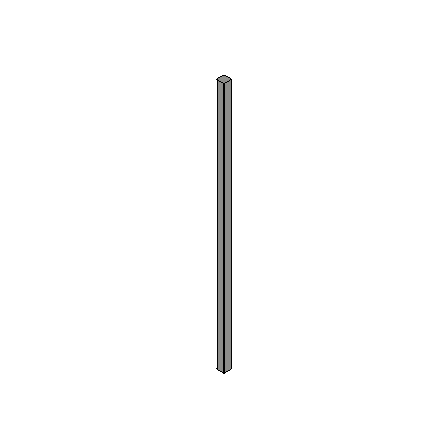

In [5]:
sample = ds[0][0]
print(sample['cadquery']) 
sample["image"]

import cadquery as cq
# Generating a workplane for sketch 0
wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(0.0, 0.0, -0.3515625), cq.Vector(3.749399456654644e-33, 1.0, -6.123233995736766e-17), cq.Vector(1.0, 0.0, 6.123233995736766e-17)))
loop0=wp_sketch0.moveTo(0.19736842105263158, 0.0).lineTo(0.2368421052631579, 0.0).lineTo(0.35526315789473684, 0.0).lineTo(0.39473684210526316, 0.0).lineTo(0.5131578947368421, 0.0).lineTo(0.5526315789473685, 0.0).lineTo(0.75, 0.0).lineTo(0.75, 0.35526315789473684).lineTo(0.5131578947368421, 0.35526315789473684).lineTo(0.2368421052631579, 0.35526315789473684).lineTo(0.0, 0.35526315789473684).lineTo(0.0, 0.0).close()
solid0=wp_sketch0.add(loop0).extrude(0.125, both=True)
solid=solid0
# Generating a workplane for sketch 1
wp_sketch1 = cq.Workplane(cq.Plane(cq.Vector(0.0, 0.234375, 0.0), cq.Vector(3.749399456654644e-33, 1.0, -6.123233995736766e-17), cq.Vector(1.0, 0.0, 6.123233995736766e-17)))
loop1=wp_sketch1.moveTo(0.28125, 0.0).lineTo(0.28125, 0.1243421052

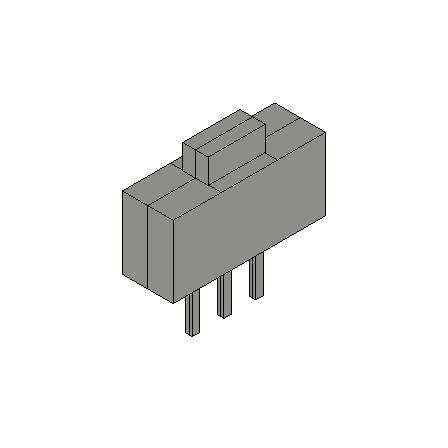

In [6]:
sample = ds[0][4]
print(sample['cadquery']) 
sample["image"]

So, like humans, our model have to look at the image first and then associate the code, but the code has a "positional hierachy", so we have to consider that for later 

## Look the image

In [7]:
import random
from torchvision import transforms
import torch
n_samples = ds[0].num_rows
sample_size = 100

random_indices = random.sample(range(n_samples), sample_size)

images = [ds[0][i]["image"] for i in random_indices]
preprocess = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # se vuoi 3 canali anche da grigio
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # da PIL a tensor float [0,1]
])


tensor_images = [preprocess(img) for img in images]

# Stack tensor
stacked = torch.stack(tensor_images)

mean = stacked.mean(dim=[0, 2, 3])
std = stacked.std(dim=[0, 2, 3])

print("Mean per canale:", mean)
print("Std per canale:", std)




Mean per canale: tensor([0.9057, 0.9057, 0.9057])
Std per canale: tensor([0.1852, 0.1852, 0.1852])


The entire dataset is too big, so we first look at a small part and then leverage


In [8]:
# Carico entrambi i split contemporaneamente
ds_train, ds_test = ds[0], ds[1]

# Opzionale: prendo solo sottoinsiemi per test veloci
ds_train = ds_train.select(range(10000))
ds_test = ds_test.select(range(2000))

print("Train size:", len(ds_train))
print("Test size:", len(ds_test))

Train size: 10000
Test size: 2000


In [ ]:
# Supponiamo tu abbia una lista di codici CadQuery (testo)
all_codes = [sample["code"] for sample in ds_train]  # adatta al tuo dataset

tokenizer = SimpleTokenizer(all_codes, min_freq=2)

# Codice di esempio
code_sample = all_codes[0]

encoded = tokenizer.encode(code_sample)
print("Encoded:", encoded)

decoded = tokenizer.decode(encoded)
print("Decoded:", decoded)


In [9]:
from torchvision import transforms
import torch

# Mean e std calcolati in precedenza
mean = mean.tolist()  # se sono tensori torch
std = std.tolist()

preprocess_norm = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # mantieni 3 canali se vuoi
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

# Se vuoi solo un sottoinsieme per test veloce, usa ds_train_sub = ds_train.select(range(1000)) per esempio
ds_train_sub = ds_train  # o sottoinsieme

# Esempio senza batch (puoi parallelizzare con DataLoader dopo)
all_tensors = []
for i in range(len(ds_train_sub)):
    img = ds_train_sub[i]['image']  # PIL Image
    tensor_img = preprocess_norm(img)  # Tensor 3x224x224 normalizzato
    all_tensors.append(tensor_img)

# Se la memoria lo consente, crea un batch tensor unico
all_tensors_batch = torch.stack(all_tensors)  # shape: [N, 3, 224, 224]

print("Shape tensore batch immagini preprocessate:", all_tensors_batch.shape)


Shape tensore batch immagini preprocessate: torch.Size([10000, 3, 224, 224])


In [10]:
import re
from collections import Counter

class SimpleTokenizer:
    def __init__(self, texts, min_freq=1):
        self.pattern = r"[\w\.]+|[^\s\w]"  # parole (con punti) o simboli singoli
        self.build_vocab(texts, min_freq)

    def build_vocab(self, texts, min_freq):
        # Conta i token su tutto il corpus
        counter = Counter()
        for text in texts:
            tokens = self.tokenize(text)
            counter.update(tokens)
        
        # Filtro per frequenza minima
        tokens = [tok for tok, freq in counter.items() if freq >= min_freq]
        
        # Aggiungo token speciali
        self.pad_token = "<PAD>"
        self.unk_token = "<UNK>"
        self.bos_token = "<BOS>"
        self.eos_token = "<EOS>"

        vocab = [self.pad_token, self.unk_token, self.bos_token, self.eos_token] + sorted(tokens)
        
        self.token2id = {tok: i for i, tok in enumerate(vocab)}
        self.id2token = {i: tok for tok, i in self.token2id.items()}
        self.vocab_size = len(vocab)
        
    def tokenize(self, text):
        return re.findall(self.pattern, text)
    
    def encode(self, text, add_special_tokens=True):
        tokens = self.tokenize(text)
        ids = [self.token2id.get(tok, self.token2id[self.unk_token]) for tok in tokens]
        if add_special_tokens:
            ids = [self.token2id[self.bos_token]] + ids + [self.token2id[self.eos_token]]
        return ids
    
    def decode(self, ids, skip_special_tokens=True):
        tokens = [self.id2token.get(i, self.unk_token) for i in ids]
        if skip_special_tokens:
            tokens = [t for t in tokens if t not in {self.pad_token, self.bos_token, self.eos_token}]
        return " ".join(tokens)


In [12]:
ds_train[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=448x448>,
 'deepcad_id': '0000/00006371',
 'cadquery': 'import cadquery as cq\n# Generating a workplane for sketch 0\nwp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(-0.015625, -0.0078125, 0.0), cq.Vector(1.0, 0.0, 0.0), cq.Vector(0.0, 0.0, 1.0)))\nloop0=wp_sketch0.moveTo(0.0, 0.0).threePointArc((0.0007948582418457166, -0.0019189575476279677), (0.0027138157894736844, -0.0027138157894736844)).lineTo(0.021217105263157895, -0.0027138157894736844).threePointArc((0.022787161438489866, -0.00206347722796355), (0.0234375, -0.000493421052631579)).lineTo(0.0234375, 0.018256578947368422).threePointArc((0.02283825686147997, 0.019949990385858287), (0.021217105263157895, 0.020723684210526318)).lineTo(0.0022203947368421052, 0.020723684210526318).threePointArc((0.0005992431385200307, 0.019949990385858287), (0.0, 0.018256578947368422)).lineTo(0.0, 0.0).close()\nsolid0=wp_sketch0.add(loop0).extrude(0.75)\nsolid=solid0\n',
 'token_count': 1292,


In [13]:
# Supponiamo tu abbia una lista di codici CadQuery (testo)
all_codes = [sample["cadquery"] for sample in ds_train]  # adatta al tuo dataset

tokenizer = SimpleTokenizer(all_codes, min_freq=2)

# Codice di esempio
code_sample = all_codes[0]

encoded = tokenizer.encode(code_sample)
print("Encoded:", encoded)

decoded = tokenizer.decode(encoded)
print("Decoded:", decoded)


Encoded: [2, 7528, 7522, 7520, 7523, 4, 7517, 7519, 7568, 7527, 7551, 15, 7569, 7516, 7526, 5, 7524, 5, 7525, 5, 8, 532, 7, 8, 310, 7, 16, 6, 7, 7525, 5, 6809, 7, 16, 7, 16, 6, 7, 7525, 5, 16, 7, 16, 7, 6809, 6, 6, 6, 7529, 7516, 7572, 5, 16, 7, 16, 6, 14, 5, 5, 1, 7, 8, 1, 6, 7, 5, 146, 7, 8, 146, 6, 6, 13, 5, 661, 7, 8, 146, 6, 14, 5, 5, 699, 7, 8, 1, 6, 7, 5, 717, 7, 8, 33, 6, 6, 13, 5, 717, 7, 596, 6, 14, 5, 5, 1, 7, 634, 6, 7, 5, 661, 7, 651, 6, 6, 13, 5, 119, 7, 651, 6, 14, 5, 5, 1, 7, 634, 6, 7, 5, 16, 7, 596, 6, 6, 13, 5, 16, 7, 16, 6, 11, 5, 6, 7556, 7516, 7570, 5, 7529, 6, 12, 5, 6138, 6, 7552, 7516, 7556, 3]
Decoded: import cadquery as cq # Generating a workplane for sketch 0 wp_sketch0 = cq.Workplane ( cq.Plane ( cq.Vector ( - 0.015625 , - 0.0078125 , 0.0 ) , cq.Vector ( 1.0 , 0.0 , 0.0 ) , cq.Vector ( 0.0 , 0.0 , 1.0 ) ) ) loop0 = wp_sketch0.moveTo ( 0.0 , 0.0 ) .threePointArc ( ( <UNK> , - <UNK> ) , ( 0.0027138157894736844 , - 0.0027138157894736844 ) ) .lineTo ( 0.0212171